In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


If you observe there are few unnecessary columns that are irrevalent to the model designing.

By just observing the columns like Unanamed:, first, last, credit card number(cc_number), street, transaction time, account number, trans_num, dob are not useful and can be directly removed. 

In [4]:
train_data.drop(["Unnamed: 0", "first", "last", "cc_num", "street", "trans_date_trans_time", "trans_num", "dob"],axis=1, inplace=True)
test_data.drop(["Unnamed: 0", "first", "last", "cc_num", "street", "trans_date_trans_time", "trans_num", "dob"],axis=1, inplace=True)

In [5]:
train_data.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [6]:
train_data.isnull().sum()

merchant      0
category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

There are no null values to handle

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city        1296675 non-null  object 
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  unix_time   1296675 non-null  int64  
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 148.4+ MB


In [8]:
train_data.describe()


,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Apart from the above mentioned the rest of the features can be described as not an integer type

Let us understand about the target variable.

In [9]:
train_data["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

You can observe the level of imbalance in the target feature

<Axes: xlabel='is_fraud', ylabel='count'>

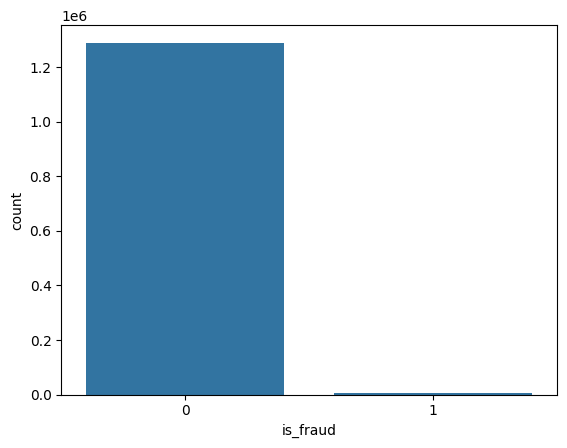

In [10]:
sns.countplot(data=train_data, x="is_fraud")

High imbalance in the target column, need to be handled.

In [11]:
cols = train_data.columns
cols

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [12]:
train_data["merchant"].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

<Axes: xlabel='merchant', ylabel='count'>

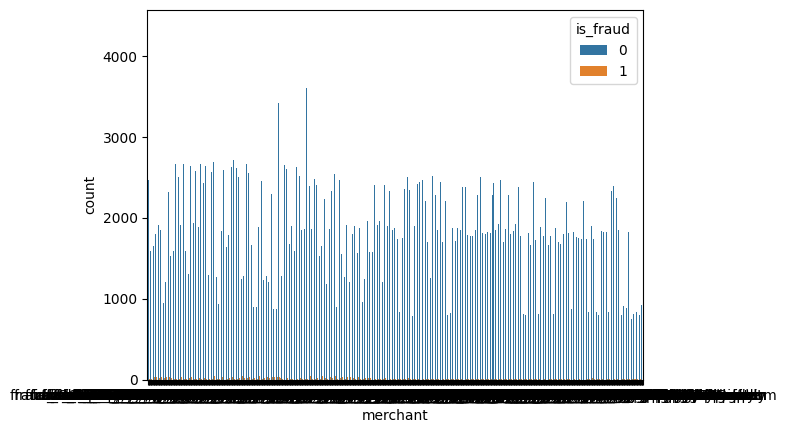

In [13]:
sns.countplot(data=train_data, x="merchant", hue="is_fraud")

From ,the above value counts only we need to understand that we can not understand any similarity between the merchant column and the target columns as there is high imbalance in the data in the target feature.


Most of the visulisations need to be without the target column, as it will not help us to understand the data better with this repective dataset.

In [14]:
cols[1]

'category'

In [15]:
train_data[cols[1]].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [16]:
pd.crosstab(train_data[cols[1]], train_data['is_fraud'], normalize='index')

is_fraud,0,1
category,,
entertainment,0.997522,0.002478
food_dining,0.998349,0.001651
gas_transport,0.995306,0.004694
grocery_net,0.997052,0.002948
grocery_pos,0.985902,0.014098
health_fitness,0.998451,0.001549
home,0.998392,0.001608
kids_pets,0.997886,0.002114
misc_net,0.985542,0.014458


<Axes: xlabel='amt', ylabel='Count'>

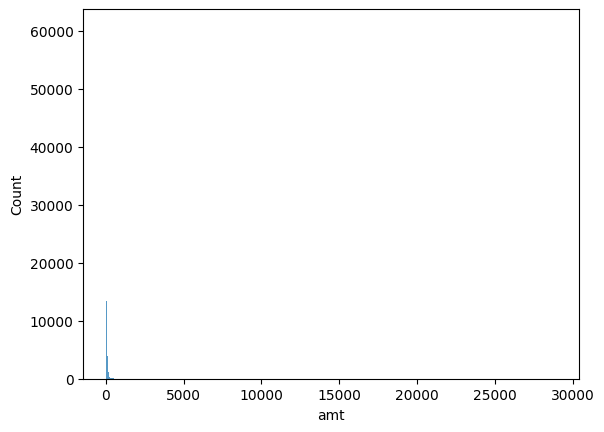

In [17]:
sns.histplot(data=train_data, x=cols[2])

<Axes: xlabel='amt'>

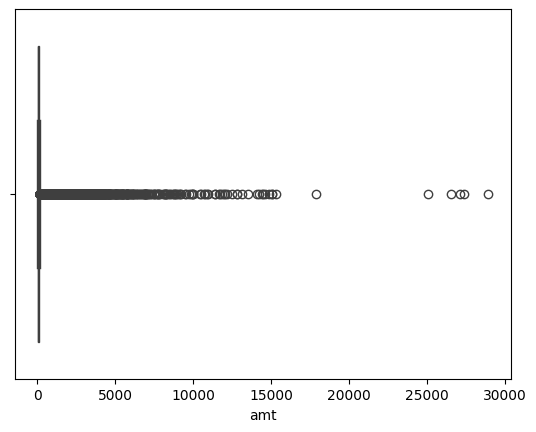

In [18]:
sns.boxplot(data=train_data, x=cols[2])

In [19]:
train_data[cols[3]].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='gender'>

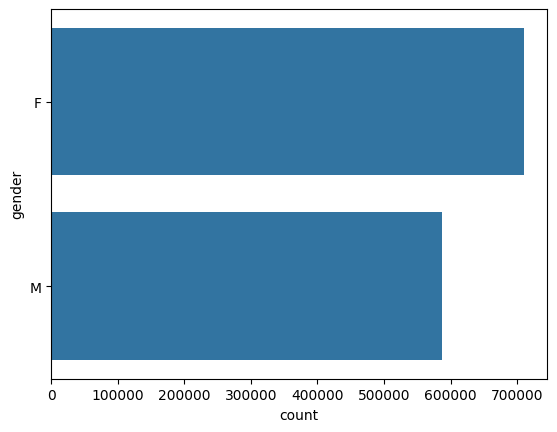

In [20]:
sns.countplot(train_data[cols[3]])

In [21]:
train_data[cols[4]].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

It gives an idea about the records in each city but cinsidering the imbalance in the target column, we can beleive that city column will not be helpful in understanding the target feature.

In [22]:
train_data[cols[5]].value_counts()

state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64

In [23]:
pd.crosstab(train_data[cols[5]], train_data['is_fraud'], normalize='index')

is_fraud,0,1
state,,
AK,0.983019,0.016981
AL,0.994755,0.005245
AR,0.994828,0.005172
AZ,0.996565,0.003435
CA,0.994216,0.005784
CO,0.991859,0.008141
CT,0.997923,0.002077
DC,0.994188,0.005812
DE,0.000000,1.000000


Same as the prvious reason

In [24]:
train_data[cols[6]].value_counts()

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
16041       7
38915       7
10018       7
23523       7
Name: count, Length: 970, dtype: int64

instead of state and city wide, using zip would be more accurate and precise. As it gives you more precise location of the target area.

In [25]:
train_data.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

It is not necessary to visualise the lat, long, merch_lat and merch_long columns.

In [26]:
train_data[cols[9]].value_counts()

city_pop
606        5496
1595797    5130
1312922    5075
1766       4574
241        4533
           ... 
99475         7
198659        7
4046          7
1888          7
3631          7
Name: count, Length: 879, dtype: int64

As we can not visualise it with the target variable but we can logically understand that population might be a parpameter here.

In [27]:
train_data[cols[10]].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

Instead of having different transaction types, the reason I deleted earlier was to just consider unix time of transaction in the dataset and also we can consider the time of transaction would be a key factor if we have balance in the target column, but in this case we would not be confident to visualise the characteristics if transaction time wiht the target column.

Let us drop the unnecessary coumns.

In [28]:
train_data.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

The dropping columns need to be job, city merchant, as merchant has merch_long and merch_lat

In [29]:
train_data.drop(["merchant","job","city"],axis=1, inplace=True)
test_data.drop(["merchant","job","city"],axis=1, inplace=True)

In [30]:
train_data.columns

Index(['category', 'amt', 'gender', 'state', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [31]:
train_data.head()


,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [33]:
train_data[["amt","city_pop","zip","lat","long","unix_time","merch_lat","merch_long"]].corr()

,amt,city_pop,zip,lat,long,unix_time,merch_lat,merch_long
amt,1.000000,0.005818,0.001843,-0.001926,-0.000187,-0.000293,-0.001873,-0.000151
city_pop,0.005818,1.000000,0.078467,-0.155730,-0.052715,-0.001714,-0.154781,-0.052687
zip,0.001843,0.078467,1.000000,-0.114290,-0.909732,0.000670,-0.113561,-0.908924
lat,-0.001926,-0.155730,-0.114290,1.000000,-0.015533,0.000632,0.993592,-0.015509
long,-0.000187,-0.052715,-0.909732,-0.015533,1.000000,-0.000642,-0.015452,0.999120
unix_time,-0.000293,-0.001714,0.000670,0.000632,-0.000642,1.000000,0.000561,-0.000635
merch_lat,-0.001873,-0.154781,-0.113561,0.993592,-0.015452,0.000561,1.000000,-0.015431
merch_long,-0.000151,-0.052687,-0.908924,-0.015509,0.999120,-0.000635,-0.015431,1.000000


<Axes: >

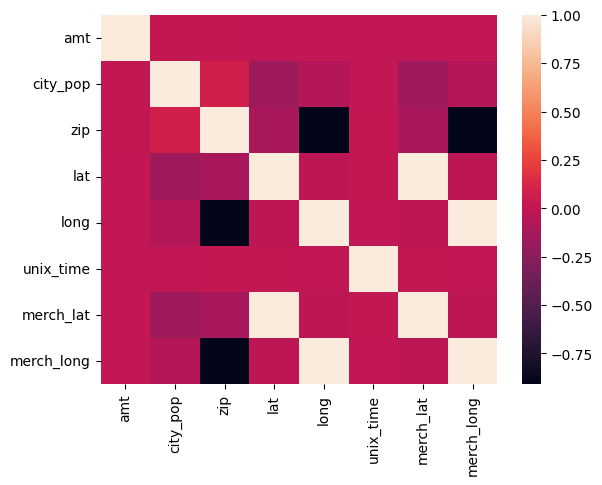

In [34]:
sns.heatmap(train_data[["amt","city_pop","zip","lat","long","unix_time","merch_lat","merch_long"]].corr())

As understood not much correlation between the variables.

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data["category"] = encoder.fit_transform(train_data["category"])
test_data['category'] = encoder.transform(test_data["category"])




In [36]:
encoder = LabelEncoder()
train_data["gender"] = encoder.fit_transform(train_data["gender"])
test_data['gender'] = encoder.transform(test_data["gender"])





In [37]:
train_data

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,4,107.23,0,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,0,220.11,1,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,2,45.00,1,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,9,41.96,1,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,UT,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,1,51.70,1,MD,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,1,105.93,1,NM,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,1,74.90,1,SD,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [38]:
encoder = LabelEncoder()
train_data["state"] = encoder.fit_transform(train_data["state"])
test_data['state'] = encoder.transform(test_data["state"])

In [39]:
train_data.head()

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,27,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,4,107.23,0,47,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,0,220.11,1,13,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,2,45.00,1,26,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,9,41.96,1,45,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


Here, we need to pass this data and test on logistic regression, decision trees and random forest

we will start with the logistic regression

In [40]:
x_train_scaled= train_data.drop(["is_fraud"],axis=1)
y_train_scaled = train_data['is_fraud']

x_test_scaled= test_data.drop(["is_fraud"],axis=1)
y_test_scaled = test_data['is_fraud']


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)


In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train_scaled)

LogisticRegression()

In [44]:
from sklearn.metrics import classification_report

pred = lr.predict(x_test_scaled)
print(classification_report(pred, y_test_scaled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    555376
           1       0.00      0.00      0.00       343

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       1.00      1.00      1.00    555719



If you see, the accuracy is 100%, but in this case considering accuracy as an metric is not a suitable one because of the data being imbalanced. Solutions to solve is increase the support value for class 1 by collecting more samples or perform techniques like smote

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train_scaled, y_train_scaled)
from sklearn.metrics import classification_report

pred = rf.predict(x_test_scaled)
print(classification_report(pred, y_test_scaled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    554380
           1       0.47      0.75      0.57      1339

    accuracy                           1.00    555719
   macro avg       0.73      0.87      0.79    555719
weighted avg       1.00      1.00      1.00    555719



if you observe, the accuracy is same but the precision, recall and f1_score got improved.

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled, y_train_scaled)
from sklearn.metrics import classification_report

pred = dtc.predict(x_test_scaled)
print(classification_report(pred, y_test_scaled))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    551715
           1       0.58      0.31      0.40      4004

    accuracy                           0.99    555719
   macro avg       0.79      0.65      0.70    555719
weighted avg       0.99      0.99      0.99    555719



We can understand, that decision tree classifier can be considered as a base of random forest and so we can understand the performance decrease with the model.

From the above 3 models, random forest classifier is the better performing classifier.

As random forest classifier do not depend on the difference in the ratio between the classes in the target variable, even after applying the techiniques like SMOTE the random forest might be little improved but the logistic regresison might be working a way better.
